---
---

# **-Feature Engineering-**
What is feature engineering? Is the process of using domain knowledge to extract features from raw data via data mining techniques

Three general approaches:
* Extracting Information (Extract value from datetime)
* Combining Information
* Transforming Information (Integer and One Hot Encoding)

---
---

# **1 - Dealing with Outliers**

In statistics, an `outlier` is a data point that `differs` `significantly` from `other` `observations`. An `outlier` may be `due` to `variability` in the `measurement` or it may `indicate` experimental `error`, the `latter` are sometimes `excluded` from the data set. An `outlier` can cause serious `problems` in statistical `analyses`.

It is `often` better to simply `remove` these `few points` from the `data set` in order to have a more `generalizaed` model.

`Remember` that even if a data point is an `outlier`, its `still` a data point! `Carefully` consider your data, its sources, and your goals whenver deciding to remove an outlier. Each case is different!

Outliers considerations:
* Range and Limits
  
  * We need to decide what will constitute an outlier with some methodology:
   - InterQuartile Range
   - Standard Deviation
   - Visualized or Domain Limit Value

* Percentage of Data

  * Keep in mind if a large percentage of your data is being labeled as an outlier, then you actually just have a wide distribution, not outliers

  * Limit outliers to a few percentage points a most

Keep in mind, this will create caveats for your future model (e.g. Model not suitable for house priced over $10 Million because you did not train data on house with price over than that)

## Goals
* Understand different mathmatical definitions of outliers
* Use Python tools to recognize outliers and remove them

### Useful Links

* [Wikipedia Article](https://en.wikipedia.org/wiki/Outlier)
* [NIST Outlier Links](https://www.itl.nist.gov/div898/handbook/prc/section1/prc16.htm)



---

## **A. Self-Made Data**

### **a. Generating Data**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Choose a mean, standard deviation, and number of samples

def create_ages(mu=50, sigma=13, num_samples=100, seed=42):

    # Set a random seed in the same cell as the random call to get the same values as us
    # We set seed to 42 (42 is an arbitrary choice from Hitchhiker's Guide to the Galaxy)
    np.random.seed(seed)

    # Draw random samples from a normal (Gaussian) distribution.
    # loc : Mean (“centre”) of the distribution.
    #s cale : Standard deviation (spread or “width”) of the distribution. Must be non-negative.
    sample_ages = np.random.normal(loc=mu, scale=sigma, size=num_samples)
    sample_ages = np.round(sample_ages, decimals=0)
    
    return sample_ages

In [ ]:
sample = create_ages()

In [ ]:
sample

array([56., 48., 58., 70., 47., 47., 71., 60., 44., 57., 44., 44., 53.,
       25., 28., 43., 37., 54., 38., 32., 69., 47., 51., 31., 43., 51.,
       35., 55., 42., 46., 42., 74., 50., 36., 61., 34., 53., 25., 33.,
       53., 60., 52., 48., 46., 31., 41., 44., 64., 54., 27., 54., 45.,
       41., 58., 63., 62., 39., 46., 54., 63., 44., 48., 36., 34., 61.,
       68., 49., 63., 55., 42., 55., 70., 50., 70., 16., 61., 51., 46.,
       51., 24., 47., 55., 69., 43., 39., 43., 62., 54., 43., 57., 51.,
       63., 41., 46., 45., 31., 54., 53., 50., 47.])

---

### **b. Visualize and Describe the Data**

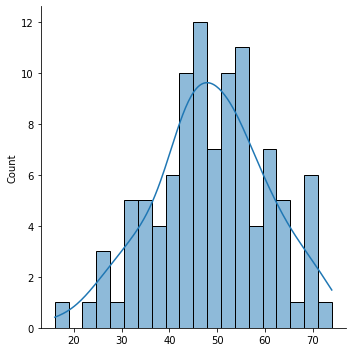

In [ ]:
sns.displot(sample, bins=20, kde=True)
plt.show()

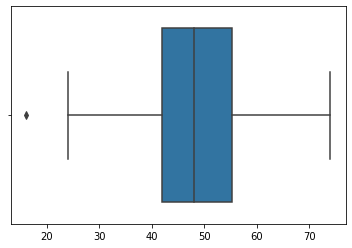

In [ ]:
sns.boxplot(x=sample)
plt.show()

In [ ]:
ser = pd.Series(sample)
ser.describe()

count    100.00000
mean      48.66000
std       11.82039
min       16.00000
25%       42.00000
50%       48.00000
75%       55.25000
max       74.00000
dtype: float64

#### *Calculate Percentile and IQR*

In [ ]:
# Return percentile of data
q1, q3 = np.percentile(sample, [25,75])
print(q1, q3)

42.0 55.25


In [ ]:
IQR = q3 - q1
lower_limit = q1 - 1.5*IQR
lower_limit

22.125

age below 22 is an outliers

---

### **c. Trimming or Fixing Based On Domain Knowledge**

If we know we're dealing with a `dataset` pertaining to `voting age` (18 years old in the USA), then it `makes sense` to either `drop anything less than` that OR `fix values lower than 18` and `push them up to 18`.

*Trim Data*

In [ ]:
ser[ser > lower_limit]

0     56.0
1     48.0
2     58.0
3     70.0
4     47.0
      ... 
95    31.0
96    54.0
97    53.0
98    50.0
99    47.0
Length: 99, dtype: float64

In [ ]:
# It dropped one person
len(ser[ser > lower_limit])

99

*Fixing Data Based-On Domain Knowledge*

In [ ]:
def fix_values(age):
    
    if age < 18:
        return 18
    else:
        return age

In [ ]:
# "Fixes" one person's age
ser.apply(fix_values)

0     56.0
1     48.0
2     58.0
3     70.0
4     47.0
      ... 
95    31.0
96    54.0
97    53.0
98    50.0
99    47.0
Length: 100, dtype: float64

In [ ]:
len(ser.apply(fix_values))

100

--------

There are many ways to identify and remove outliers:
* Trimming based off a provided value
* Capping based off IQR or STD
* https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba
* https://towardsdatascience.com/5-ways-to-detect-outliers-that-every-data-scientist-should-know-python-code-70a54335a623

---

## **B. Ames Data Set**

Let's explore any extreme outliers in our Ames Housing Data Set

### **a. Read Data**

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Data_Science/Materi/Notes/6_Feature_Engineering/Ames_Housing_Data.csv')

In [ ]:
df.head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,...,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.0,TA,TA,CBlock,TA,Gd,Gd,BLQ,639.0,Unf,0.0,441.0,1080.0,GasA,...,Y,SBrkr,1656,0,0,1656,1.0,0.0,1,0,3,1,TA,7,Typ,2,Gd,Attchd,1960.0,Fin,2.0,528.0,TA,TA,P,210,62,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,...,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,...,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,BrkFace,None,0.0,Gd,TA,CBlock,TA,TA,No,ALQ,1065.0,Unf,0.0,1045.0,2110.0,GasA,...,Y,SBrkr,2110,0,0,2110,1.0,0.0,2,1,3,1,Ex,8,Typ,2,TA,Attchd,1968.0,Fin,2.0,522.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,...,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [ ]:
df_copy = df.copy()

---

### **b. Data Correlations**

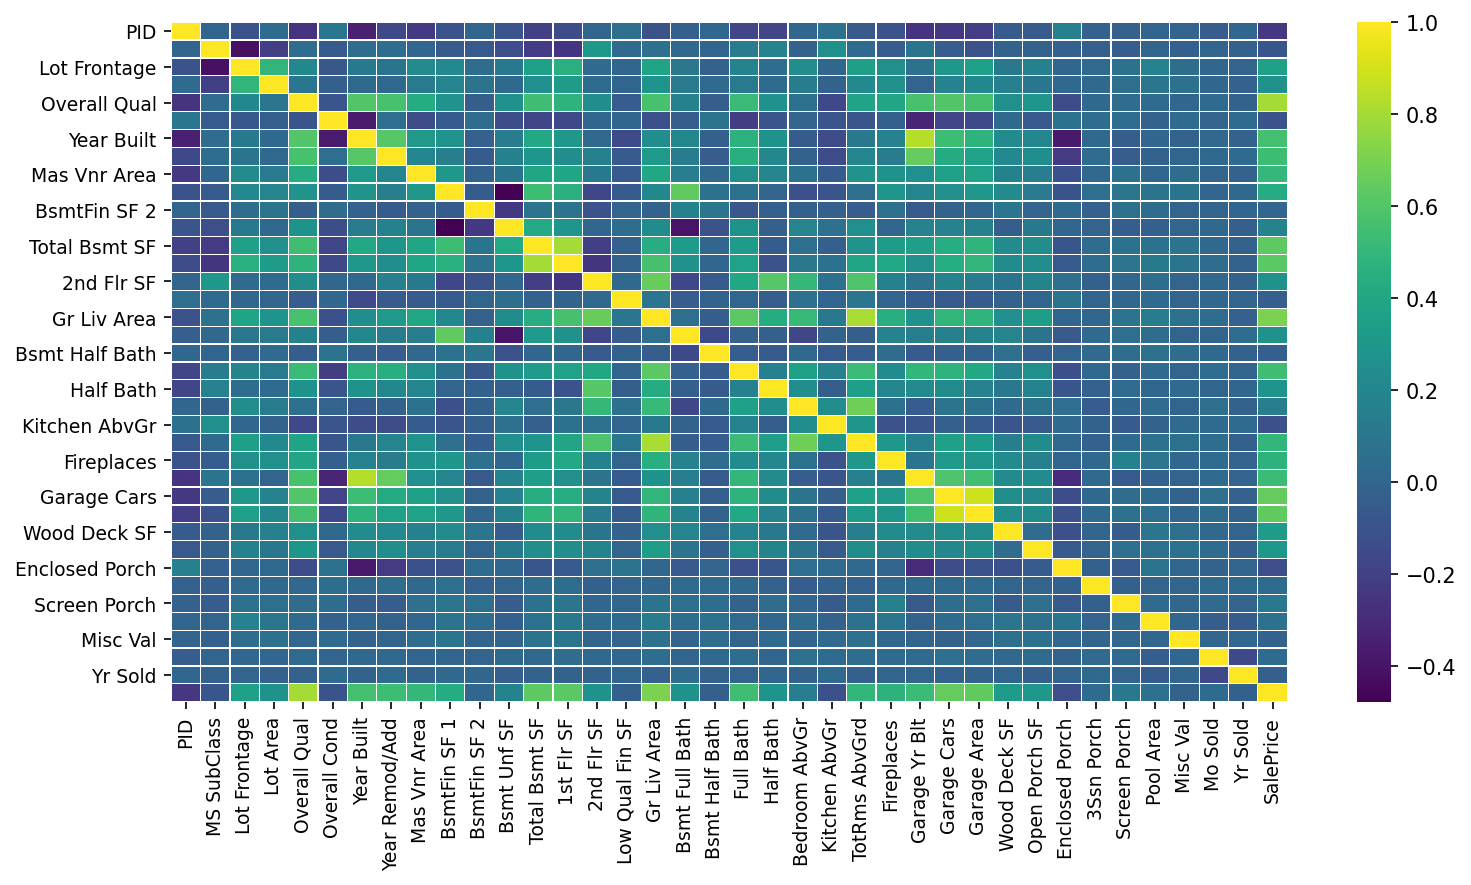

In [ ]:
# Plot Pearson Correlation on Heatmap
plt.figure(figsize=(12,6), dpi=150)
sns.heatmap(df_copy.corr(), cmap='viridis', lw=0.1)
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)
plt.show()

In [ ]:
# Return pearson correlation in 'SalePrice'
df_copy.corr()['SalePrice'].sort_values()

PID               -0.246521
Enclosed Porch    -0.128787
Kitchen AbvGr     -0.119814
Overall Cond      -0.101697
MS SubClass       -0.085092
Low Qual Fin SF   -0.037660
Bsmt Half Bath    -0.035835
Yr Sold           -0.030569
Misc Val          -0.015691
BsmtFin SF 2       0.005891
3Ssn Porch         0.032225
Mo Sold            0.035259
Pool Area          0.068403
Screen Porch       0.112151
Bedroom AbvGr      0.143913
Bsmt Unf SF        0.182855
Lot Area           0.266549
2nd Flr SF         0.269373
Bsmt Full Bath     0.276050
Half Bath          0.285056
Open Porch SF      0.312951
Wood Deck SF       0.327143
Lot Frontage       0.357318
BsmtFin SF 1       0.432914
Fireplaces         0.474558
TotRms AbvGrd      0.495474
Mas Vnr Area       0.508285
Garage Yr Blt      0.526965
Year Remod/Add     0.532974
Full Bath          0.545604
Year Built         0.558426
1st Flr SF         0.621676
Total Bsmt SF      0.632280
Garage Area        0.640401
Garage Cars        0.647877
Gr Liv Area        0

---

### **c. Search Outliers and Data Cleaning**

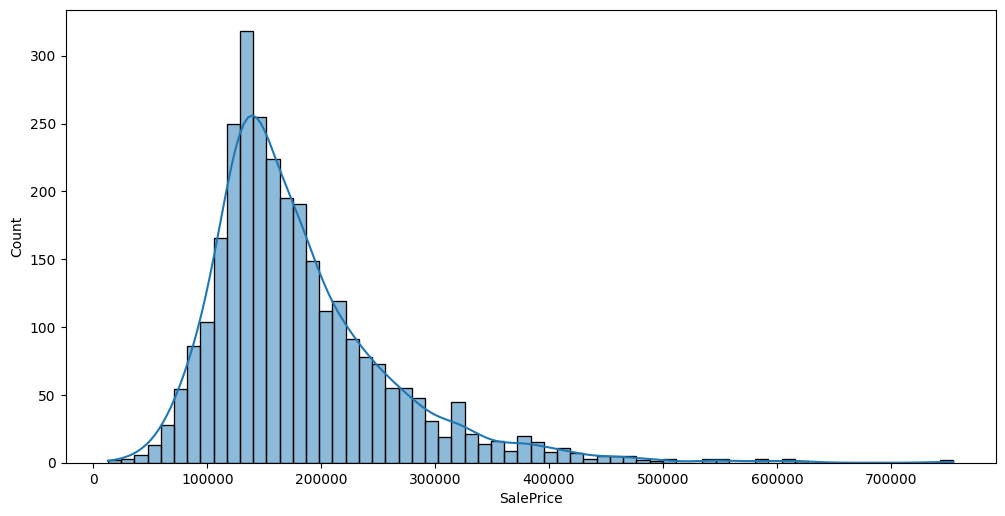

In [ ]:
# Plot the distribution of 'SalePrice'
plt.figure(figsize=(12,6), dpi=100)
sns.histplot(df_copy["SalePrice"], kde=True)
plt.show()

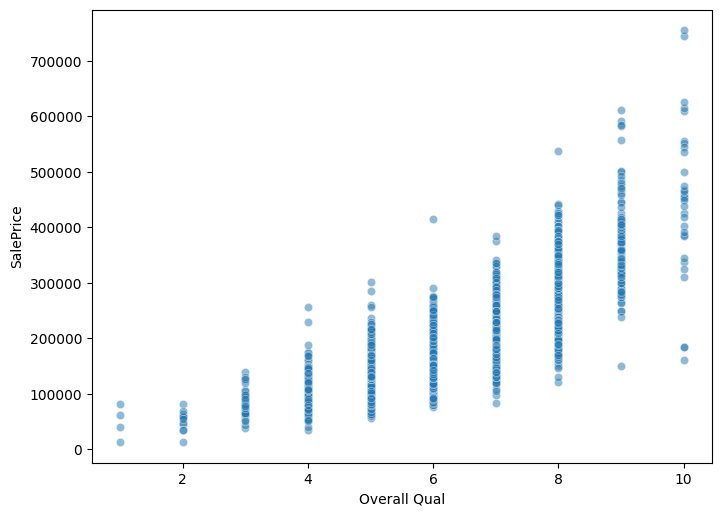

In [ ]:
# Plot 'Overall Qual' vs 'SalePrice' (Highest Relation)
plt.figure(figsize=(8,6), dpi=100)
sns.scatterplot(x='Overall Qual', y='SalePrice', data=df_copy, alpha=0.5)
plt.show()

Based on image above, the `higher` the `overall quality`, the `price` likely to be `higher`. But there is an `outliers` in the data `where` with `high` quality, the `price` is `not like` the other `('Overall Qual' > 8 and 'SalePrice' < 200000)`, let search another relationship that more clear.

In [ ]:
# Return the outlier data based on 'Overall Qual' and SalesPrice (Look image above)
df_copy[(df_copy['Overall Qual']>8) & (df_copy['SalePrice']<200000)]

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,...,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1182,533350090,60,RL,NaN,24572,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Veenker,Norm,Norm,1Fam,2Story,9,3,1977,1977,Mansard,CompShg,Wd Sdng,Wd Sdng,BrkFace,1050.0,Gd,Gd,CBlock,Gd,TA,No,GLQ,410.0,Unf,0.0,584.0,994.0,GasA,...,Y,SBrkr,1599,1345,0,2944,0.0,0.0,2,2,3,1,Gd,9,Typ,1,Gd,Attchd,1977.0,RFn,3.0,864.0,TA,TA,Y,140,70,16,0,0,0,NaN,NaN,NaN,0,6,2008,WD,Family,150000
1498,908154235,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,Corner,Gtl,Edwards,Feedr,Norm,1Fam,2Story,10,5,2008,2008,Hip,ClyTile,Stucco,Stucco,Stone,796.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,5644.0,Unf,0.0,466.0,6110.0,GasA,...,Y,SBrkr,4692,950,0,5642,2.0,0.0,2,1,3,1,Ex,12,Typ,3,Gd,Attchd,2008.0,Fin,2.0,1418.0,TA,TA,Y,214,292,0,0,0,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
2180,908154195,20,RL,128.0,39290,Pave,NaN,IR1,Bnk,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,10,5,2008,2009,Hip,CompShg,CemntBd,CmentBd,Stone,1224.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,4010.0,Unf,0.0,1085.0,5095.0,GasA,...,Y,SBrkr,5095,0,0,5095,1.0,1.0,2,1,2,1,Ex,15,Typ,2,Gd,Attchd,2008.0,Fin,3.0,1154.0,TA,TA,Y,546,484,0,0,0,0,NaN,NaN,Elev,17000,10,2007,New,Partial,183850
2181,908154205,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,Inside,Gtl,Edwards,PosN,PosN,1Fam,2Story,10,5,2007,2008,Hip,CompShg,CemntBd,CmentBd,Stone,762.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,2260.0,Unf,0.0,878.0,3138.0,GasA,...,Y,SBrkr,3138,1538,0,4676,1.0,0.0,3,1,3,1,Ex,11,Typ,1,Gd,BuiltIn,2007.0,Fin,3.0,884.0,TA,TA,Y,208,406,0,0,0,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750


In [ ]:
df_copy[(df_copy['Overall Qual']>8) & (df_copy['SalePrice']<200000)].index

Int64Index([1182, 1498, 2180, 2181], dtype='int64')

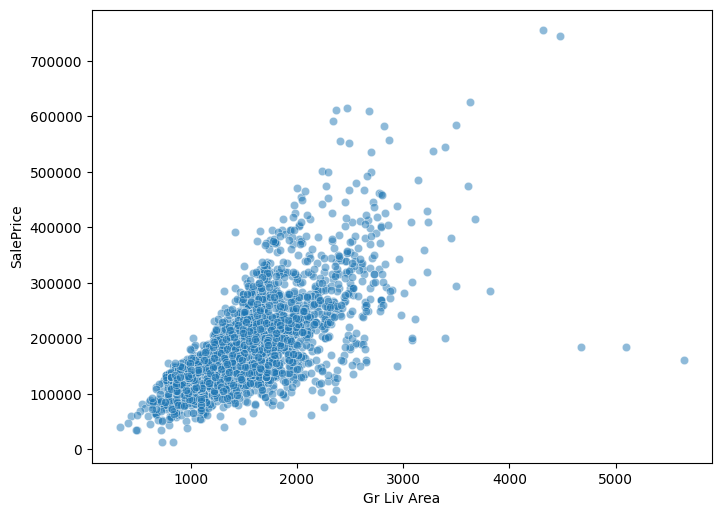

In [ ]:
# Plot 'Gr Liv Area' vs 'SalePrice' (2nd Highest Relation)
plt.figure(figsize=(8,6), dpi=100)
sns.scatterplot(x='Gr Liv Area', y='SalePrice', data=df_copy, alpha=0.5)
plt.show()

Based on image above, the `wider` the `Gr Living Area`, the `price` tends to be `higher`. But there is also an oulier in the data where `'Gr Liv Area' > 4000 and 'SalePrice' < 200000`. Because it is `double` the 'Gr Liv Area' but the 'SalePrice' is `not` much `differs` (not following the trends line)

In [ ]:
# Check the outliers data
df_copy[(df_copy['Gr Liv Area']>4000) & (df_copy['SalePrice']<200000)]

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,...,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1498,908154235,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,Corner,Gtl,Edwards,Feedr,Norm,1Fam,2Story,10,5,2008,2008,Hip,ClyTile,Stucco,Stucco,Stone,796.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,5644.0,Unf,0.0,466.0,6110.0,GasA,...,Y,SBrkr,4692,950,0,5642,2.0,0.0,2,1,3,1,Ex,12,Typ,3,Gd,Attchd,2008.0,Fin,2.0,1418.0,TA,TA,Y,214,292,0,0,0,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
2180,908154195,20,RL,128.0,39290,Pave,NaN,IR1,Bnk,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,10,5,2008,2009,Hip,CompShg,CemntBd,CmentBd,Stone,1224.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,4010.0,Unf,0.0,1085.0,5095.0,GasA,...,Y,SBrkr,5095,0,0,5095,1.0,1.0,2,1,2,1,Ex,15,Typ,2,Gd,Attchd,2008.0,Fin,3.0,1154.0,TA,TA,Y,546,484,0,0,0,0,NaN,NaN,Elev,17000,10,2007,New,Partial,183850
2181,908154205,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,Inside,Gtl,Edwards,PosN,PosN,1Fam,2Story,10,5,2007,2008,Hip,CompShg,CemntBd,CmentBd,Stone,762.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,2260.0,Unf,0.0,878.0,3138.0,GasA,...,Y,SBrkr,3138,1538,0,4676,1.0,0.0,3,1,3,1,Ex,11,Typ,1,Gd,BuiltIn,2007.0,Fin,3.0,884.0,TA,TA,Y,208,406,0,0,0,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750


In [ ]:
df_copy[(df_copy['Gr Liv Area']>4000) & (df_copy['SalePrice']<200000)].index

Int64Index([1498, 2180, 2181], dtype='int64')

There is `same rows` from `'Overall Qual'` too (1498, 2180, 2181).

So lets `drop` the row

In [ ]:
ind_drop = df_copy[(df_copy['Gr Liv Area']>4000) & (df_copy['SalePrice']<200000)].index

In [ ]:
# Drop the outliers row 
df_copy = df_copy.drop(ind_drop,axis=0)

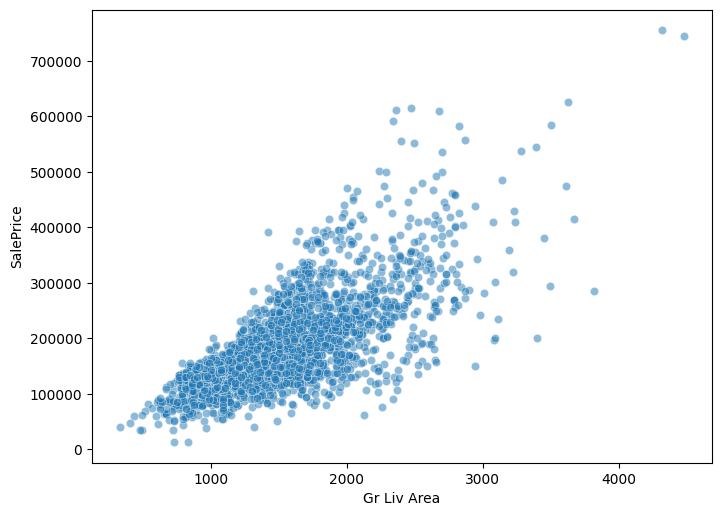

In [ ]:
# Plot 'Gr Liv Area' vs 'SalePrice' without outliers
plt.figure(figsize=(8,6), dpi=100)
sns.scatterplot(x='Gr Liv Area', y='SalePrice', data=df_copy, alpha=0.5)
plt.show()

The outliers is dropped

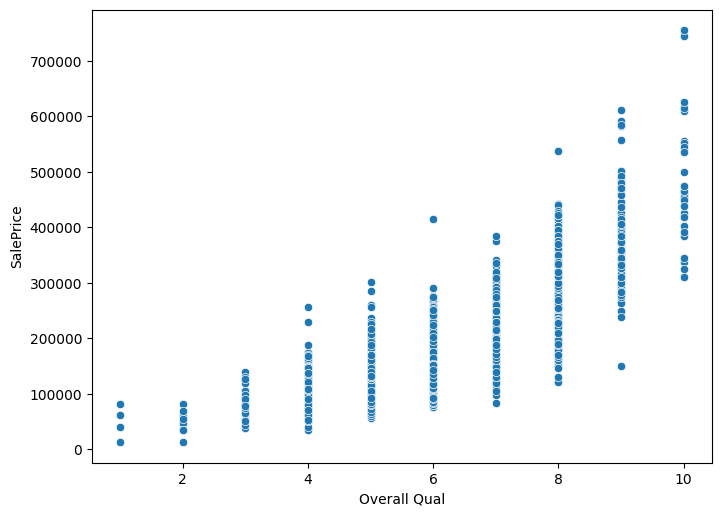

In [ ]:
# Plot 'Overall Quall' vs 'SalePrice' without outliers
plt.figure(figsize=(8,6), dpi=100)
sns.scatterplot(x='Overall Qual',y='SalePrice',data=df_copy)
plt.show()

The outliers is dropped

---

### **d. Save Outliers Removed DF**

In [ ]:
df_copy.to_csv('/content/drive/MyDrive/Data_Science/Materi/Notes/6_Feature_Engineering/Ames_outliers_removed.csv', index=False)

---
---

# **2 - Dealing with Missing Data**

We already reviewed Pandas operations for missing data, now let's apply this to clean a real data file. Keep in mind, there is no 100% correct way of doing this, and this notebook just serves as an example of some reasonable approaches to take on this data.

#### Note: Throughout this section we will be slowly cleaning and adding features to the Ames Housing Dataset for use in the next section. Make sure to always be loading the same file name as in the notebook.

#### 2nd Note: Some of the methods shown here may not lead to optimal performance, but instead are shown to display examples of various methods available.


## **A. Data Description (Important !!)**


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Read the Features Description of Data Set
with open('/content/drive/MyDrive/Data_Science/Materi/Notes/6_Feature_Engineering/Ames_Housing_Feature_Description.txt','r') as f: 
    print(f.read())

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Data_Science/Materi/Notes/6_Feature_Engineering/Ames_outliers_removed.csv')

In [ ]:
df.head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,...,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.0,TA,TA,CBlock,TA,Gd,Gd,BLQ,639.0,Unf,0.0,441.0,1080.0,GasA,...,Y,SBrkr,1656,0,0,1656,1.0,0.0,1,0,3,1,TA,7,Typ,2,Gd,Attchd,1960.0,Fin,2.0,528.0,TA,TA,P,210,62,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,...,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,...,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,BrkFace,None,0.0,Gd,TA,CBlock,TA,TA,No,ALQ,1065.0,Unf,0.0,1045.0,2110.0,GasA,...,Y,SBrkr,2110,0,0,2110,1.0,0.0,2,1,3,1,Ex,8,Typ,2,TA,Attchd,1968.0,Fin,2.0,522.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,...,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2927 entries, 0 to 2926
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PID              2927 non-null   int64  
 1   MS SubClass      2927 non-null   int64  
 2   MS Zoning        2927 non-null   object 
 3   Lot Frontage     2437 non-null   float64
 4   Lot Area         2927 non-null   int64  
 5   Street           2927 non-null   object 
 6   Alley            198 non-null    object 
 7   Lot Shape        2927 non-null   object 
 8   Land Contour     2927 non-null   object 
 9   Utilities        2927 non-null   object 
 10  Lot Config       2927 non-null   object 
 11  Land Slope       2927 non-null   object 
 12  Neighborhood     2927 non-null   object 
 13  Condition 1      2927 non-null   object 
 14  Condition 2      2927 non-null   object 
 15  Bldg Type        2927 non-null   object 
 16  House Style      2927 non-null   object 
 17  Overall Qual  

In [ ]:
df_copy = df.copy()

---

## **B. Removing the PID**

We already have an index, so we don't need the PID unique identifier for the regression we will perform later on.

In [ ]:
df_copy = df_copy.drop('PID', axis=1)

In [ ]:
len(df_copy.columns)

80

---

## **C. Observing NaN Features**

In [ ]:
df_copy.isnull()

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,False,False,False,False,False,False
1,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False
2,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False
3,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,False,False,False,False,False,False
4,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2922,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True

In [ ]:
df_copy.isnull().sum()

MS SubClass         0
MS Zoning           0
Lot Frontage      490
Lot Area            0
Street              0
                 ... 
Mo Sold             0
Yr Sold             0
Sale Type           0
Sale Condition      0
SalePrice           0
Length: 80, dtype: int64

In [ ]:
100 * (df_copy.isnull().sum() / len(df_copy))

MS SubClass        0.00000
MS Zoning          0.00000
Lot Frontage      16.74069
Lot Area           0.00000
Street             0.00000
                    ...   
Mo Sold            0.00000
Yr Sold            0.00000
Sale Type          0.00000
Sale Condition     0.00000
SalePrice          0.00000
Length: 80, dtype: float64

In [ ]:
# Create function to calculate missing data percentage
def percent_missing(df):
    # Calculate the percentage
    percent_nan = 100 * (df.isnull().sum() / len(df))

    # Pick Data that have columns with missing data
    percent_nan = percent_nan[percent_nan > 0 ].sort_values()

    return percent_nan

In [ ]:
# percentage = 100 * (df_copy.isnull().sum() / len(df_copy))
# percent_nan = percentage[percentage > 0 ].sort_values()
# OR
percent_nan = percent_missing(df_copy)
percent_nan.tail()

Fireplace Qu    48.582166
Fence           80.457807
Alley           93.235395
Misc Feature    96.412709
Pool QC         99.590024
dtype: float64

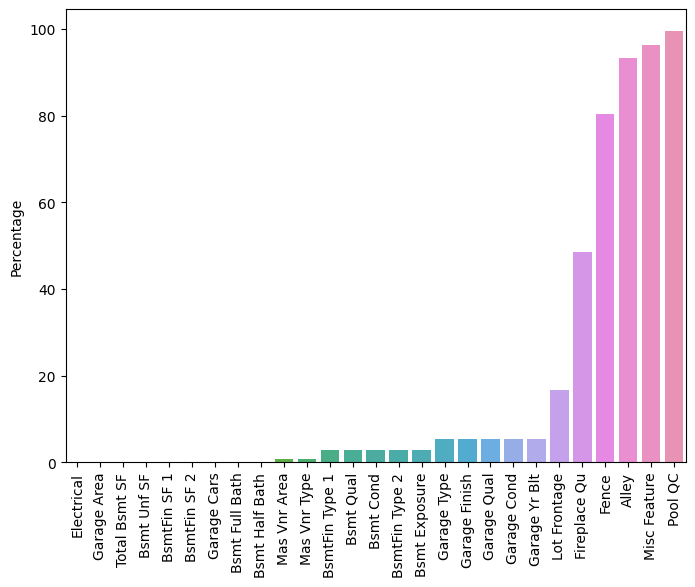

In [ ]:
# Plot percentages of missing data in features
plt.figure(figsize=(8,6), dpi=100)
sns.barplot(x=percent_nan.index, y=percent_nan)
plt.xticks(rotation=90)
plt.ylabel('Percentage')
plt.show()

---

## **D. Removing Features or Removing Rows**

If `only` a `few rows` `relative` to the `size` of your `dataset` are `missing` some values, then it `might` just be a good idea to `drop` those `rows`. What does this `cost` you in `terms` of performace? It essentialy `removes potential` training/testing data, but `if` its `only` a `few rows`, its `unlikely` to `change` performance.

---
Sometimes it is a `good idea` to `remove` a `feature entirely` if it has `too many null` values. `However`, you should carefully `consider` why it has so `many null` values, in certain `situations` `null` could just be used as a `separate` category. 

---
Take `for example` a `feature` column for the `number of cars` that can `fit` into a `garage`. `Perhaps` if there is `no garage` then `there` is a `null` value, `instead` of a zero. It `probably` makes `more sense` to quickly `fill` the `null` values `in this case` with a `zero` instead of a `null`. Only you can decide based off your domain expertise and knowledge of the data set!

### **Working based on Rows Missing Data**

## Filling in Data or Dropping Data?

Let's explore how to `choose` to `remove` or `fill` in `missing data for rows` that are missing some data. Let's choose some `threshold` where we `decide` it is ok to drop a row if its missing some data (instead of attempting to `fill` in that missing data point). We will `choose` 1% as our threshold. This means if `less` than 1% of the `rows` are `missing` this feature, we will consider just `dropping` that `row`, `instead` of dealing with the feature itself. There is no right answer here, just use common sense and your domain knowledge of the dataset, obviously you `don't want` to `drop rows with a very high threshold` like 50% , you should also explore correlation to the dataset, maybe it makes sense to `drop the feature` instead.

Based on the `text description` of the features, you will see that most of this `missing data` is actually `NaN` on `purpose` as a `placeholder` for 0 or "none".

#### *Example of Filling in Data : Basement Columns*

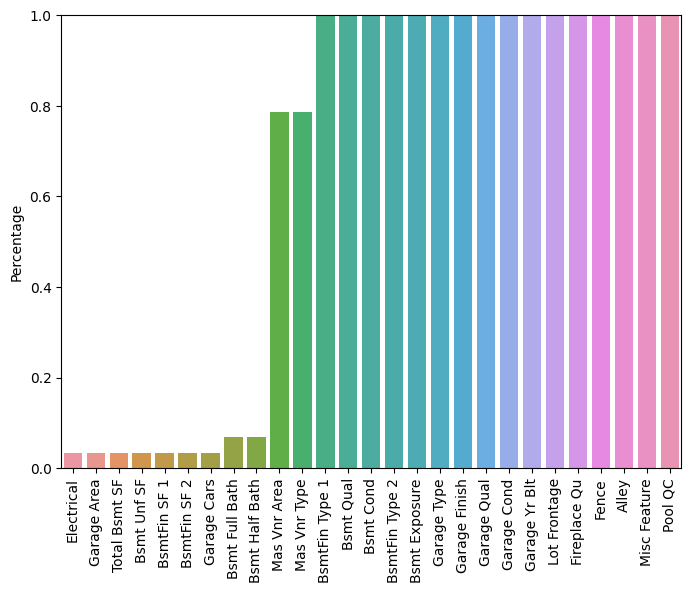

In [ ]:
plt.figure(figsize=(8,6), dpi=100)
sns.barplot(x=percent_nan.index, y=percent_nan)
plt.xticks(rotation=90)
plt.ylabel('Percentage')

# Set 1% Threshold
plt.ylim(0,1)
plt.show()

Let's `drop` or `fill` the `rows` `based` on this `data`. You could `either` `manually fill` in the `data` (`especially` the `Basement` data `based` on the `description` text file) OR you could simply `drop` the `row` and `not consider` it. In `reality` it probably `makes` more `sense` to `fill` in the `Missing Basement` data `since` its `well described` in `the text description`.

In [ ]:
# Considering either drop rows or fill the missing data
percent_nan[percent_nan < 1]

Electrical        0.034165
Garage Area       0.034165
Total Bsmt SF     0.034165
Bsmt Unf SF       0.034165
BsmtFin SF 1      0.034165
BsmtFin SF 2      0.034165
Garage Cars       0.034165
Bsmt Full Bath    0.068329
Bsmt Half Bath    0.068329
Mas Vnr Area      0.785787
Mas Vnr Type      0.785787
dtype: float64

In [ ]:
# percentage of 1 row
100/len(df_copy)

0.0341646737273659

In [ ]:
df_copy[df_copy['Total Bsmt SF'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1341,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,FR3,Gtl,BrkSide,Feedr,Norm,1Fam,1Story,4,7,1946,1950,Gable,CompShg,MetalSd,CBlock,None,0.0,TA,TA,PConc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GasA,TA,Y,FuseA,896,0,0,896,NaN,NaN,1,0,2,1,TA,4,Typ,0,NaN,Detchd,1946.0,Unf,1.0,280.0,TA,TA,Y,0,0,0,0,0,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml,79000


In [ ]:
df_copy[df_copy['Bsmt Half Bath'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1341,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,FR3,Gtl,BrkSide,Feedr,Norm,1Fam,1Story,4,7,1946,1950,Gable,CompShg,MetalSd,CBlock,None,0.0,TA,TA,PConc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GasA,TA,Y,FuseA,896,0,0,896,NaN,NaN,1,0,2,1,TA,4,Typ,0,NaN,Detchd,1946.0,Unf,1.0,280.0,TA,TA,Y,0,0,0,0,0,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml,79000
1497,20,RL,123.0,47007,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,7,1959,1996,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,Slab,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,GasA,TA,Y,SBrkr,3820,0,0,3820,NaN,NaN,3,1,5,1,Ex,11,Typ,2,Gd,Attchd,1959.0,Unf,2.0,624.0,TA,TA,Y,0,372,0,0,0,0,NaN,NaN,NaN,0,7,2008,WD,Normal,284700


**Filling in data based on column names. There are `2 types` of basement `features`, `numerical` and `string` descriptives.**

The numerical basement columns (Check Data Description):

In [ ]:
# Fill with number, because NaN in this column is mean 0 (this house not has basement)
bsmt_num_cols = ['BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF','Total Bsmt SF', 'Bsmt Full Bath', 'Bsmt Half Bath']
df_copy[bsmt_num_cols] = df_copy[bsmt_num_cols].fillna(0)

The string basement columns (Check Data Description):

In [ ]:
# Fill with number, because NaN in this column is mean None (this house not has basement)
bsmt_str_cols =  ['Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2']
df_copy[bsmt_str_cols] = df_copy[bsmt_str_cols].fillna('None')

In [ ]:
# Get the newly percentage of missing value
percent_nan = percent_missing(df_copy)

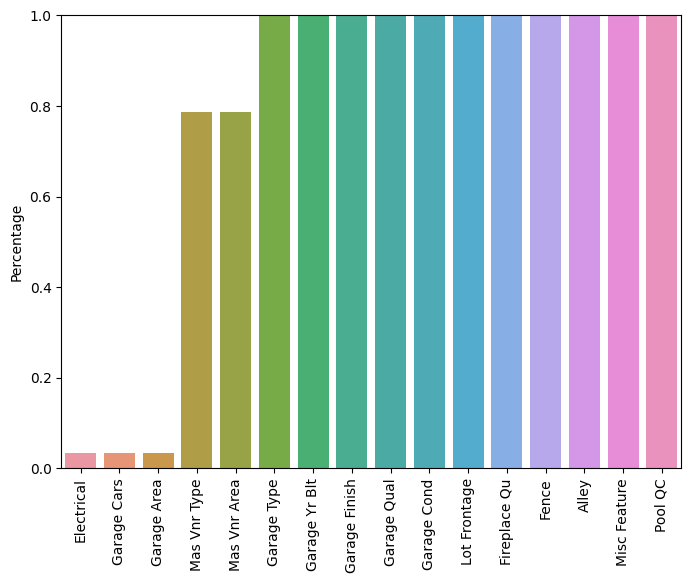

In [ ]:
plt.figure(figsize=(8,6), dpi=100)
sns.barplot(x=percent_nan.index, y=percent_nan)
plt.xticks(rotation=90)
plt.ylabel('Percentage')
plt.ylim(0,1)
plt.show()

---

#### *Dropping Rows*

A few of these features appear that it is just one or two rows missing the data. Based on our description .txt file of the dataset, we could also fill in these data points easily, and that is the more correct approach, but here we show how to drop in case you find yourself in a situation where it makes more sense to drop a row, based on missing column features.

    df.dropna() ---
        subset : array-like, optional
                Labels along other axis to consider, e.g. if you are dropping rows
                these would be a list of columns to include.

In [ ]:
# Check if NaN 'Electrical' also has NaN 'Garage Area'
df_copy[df_copy['Electrical'].isnull()]['Garage Area']

1576    400.0
Name: Garage Area, dtype: float64

So the row with NaN 'Electrical' has 'Garage Area'

In [ ]:
df_copy[df_copy['Garage Area'].isnull()]['Garage Cars']

2233   NaN
Name: Garage Cars, dtype: float64

The row with NaN 'Garage Area' also has NaN 'Garage Cars'

In [ ]:
# Drop row that has NaN value from 'Electrical' and 'Garage Cars'
df_copy = df_copy.dropna(axis=0, subset= ['Electrical', 'Garage Area'])

In [ ]:
# Get the newly percentage of missing value
percent_nan = percent_missing(df_copy)

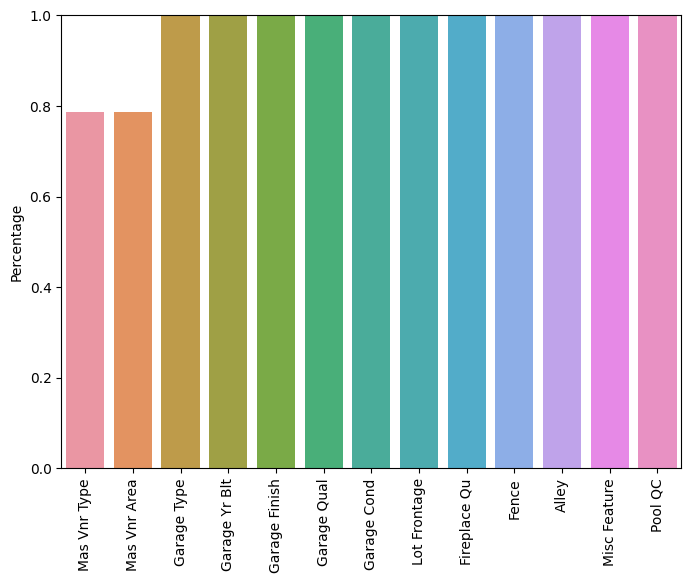

In [ ]:
plt.figure(figsize=(8,6), dpi=100)
sns.barplot(x=percent_nan.index, y=percent_nan)
plt.xticks(rotation=90)
plt.ylabel('Percentage')
plt.ylim(0,1)
plt.show()

---

#### *Mas Vnr Feature* 

Based on the `Description` Text File, `Mas Vnr Type` and `Mas Vnr Area` being `missing` (NaN) is `likely` to mean the house simply just `doesn't have a masonry veneer`, in which case, we will `fill` in this data as we did before.

    MasVnrType: Masonry veneer type

          BrkCmn	 Brick Common
          BrkFace	Brick Face
          CBlock	 Cinder Block
          None	   None
          Stone	  Stone
      
    MasVnrArea: Masonry veneer area in square feet

In [ ]:
df_copy["Mas Vnr Type"] = df_copy["Mas Vnr Type"].fillna("None")
df_copy["Mas Vnr Area"] = df_copy["Mas Vnr Area"].fillna(0)

In [ ]:
percent_nan = percent_missing(df_copy)

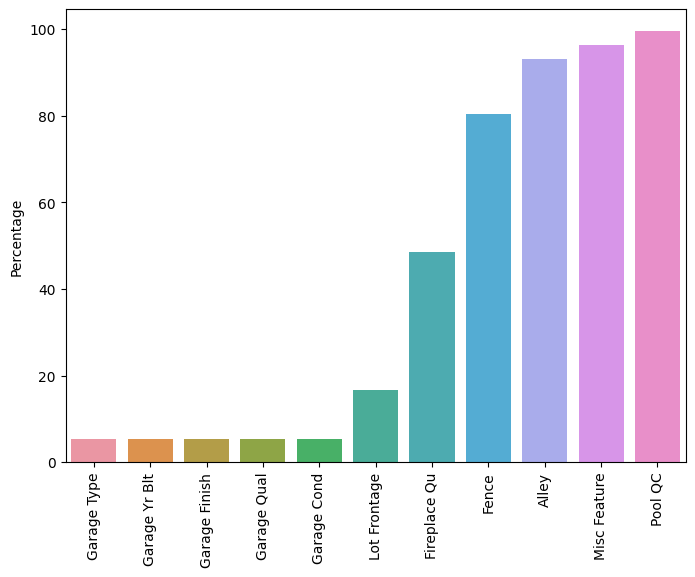

In [ ]:
plt.figure(figsize=(8,6), dpi=100)
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90)
plt.ylabel('Percentage')
plt.show()

---

## **E. Removing or Filling In Missing Column Data**

Our previous approaches were based more on rows missing data, now we will take an approach based on the column features themselves, since larger percentages of the data appears to be missing.

We are now dealing with missing data that goes beyond our 1% threshold

Dropping the Feature Column:

* Pros:
  1. Very simple to do
  2. No longer need to worry about that feature in the future

* Cons:
  1. Potential to lose a feature with possible important signal
  2. Should consider drop feature approach when many row are NaN

Filling in the Missing Feature Data:
* Potentially changing the ground truth in data
* Must decide on reasonable estimation to filled value
* Must apply transformation to all future data for prediction
* Simplest case:
    
      Replace all NaN values with a reasonable assumption 
      (e.g. zero if assumed NaN implied zero)

* Harder cases:
    
      Must use statistical methods based on other columns
      to fill in NaN values

* Statistical Estimation:

      Dataset about people with some age data missing,
      could use current career/education status to fill 
      in data (e.g. people currently in college fill in with 20 years)

### **a. Check the Missing Data > 80%**

Based on the data description, these NaN seem to indicate no garage, so we will substitute with "None" or 0.

    GarageType: Garage location
        
          2Types	 More than one type of garage
          Attchd	 Attached to home
          Basment	Basement Garage
          BuiltIn	Built-In (Garage part of house - typically has room above garage)
          CarPort	Car Port
          Detchd	 Detached from home
          NA	     No Garage
        
    GarageFinish: Interior finish of the garage

          Fin	Finished
          RFn	Rough Finished	
          Unf	Unfinished
          NA	 No Garage

    GarageQual: Garage quality

          Ex	Excellent
          Gd	Good
          TA	Typical/Average
          Fa	Fair
          Po	Poor
          NA	No Garage
        
    GarageCond: Garage condition

          Ex	Excellent
          Gd	Good
          TA	Typical/Average
          Fa	Fair
          Po	Poor
          NA	No Garage

    GarageYrBlt: Year garage was built

----

#### *Filling in Data*

In [ ]:
df_copy[['Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond']]

,Garage Type,Garage Finish,Garage Qual,Garage Cond
0,Attchd,Fin,TA,TA
1,Attchd,Unf,TA,TA
2,Attchd,Unf,TA,TA
3,Attchd,Fin,TA,TA
4,Attchd,Fin,TA,TA
...,...,...,...,...
2922,Detchd,Unf,TA,TA
2923,Attchd,Unf,TA,TA
2924,NaN,NaN,NaN,NaN
2925,Attchd,RFn,TA,TA


In [ ]:
# Fill the str data
gar_str_cols = ['Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond']
df_copy[gar_str_cols] = df_copy[gar_str_cols].fillna('None')

In [ ]:
# Fill the numeric data
df_copy['Garage Yr Blt'] = df_copy['Garage Yr Blt'].fillna(0)

In [ ]:
percent_nan = percent_missing(df_copy)

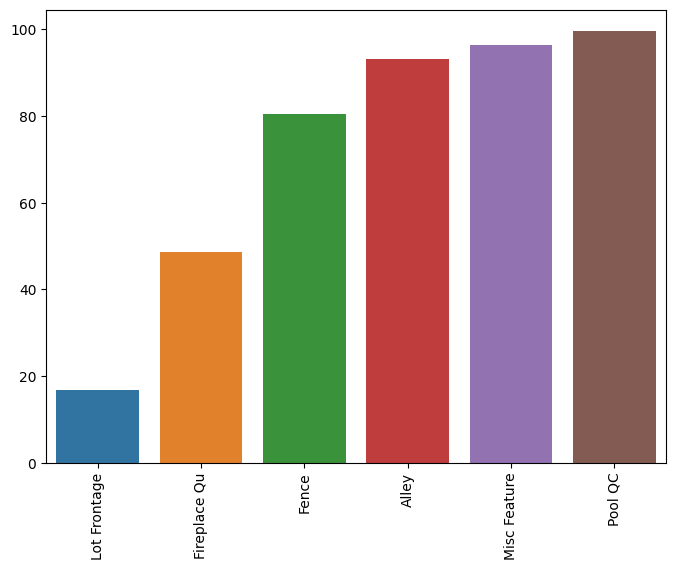

In [ ]:
plt.figure(figsize=(8,6), dpi=100)
sns.barplot(x=percent_nan.index, y=percent_nan)
plt.xticks(rotation=90)
plt.show()

---

#### *Dropping Feature Columns*

Sometimes you may want to take the approach that above a certain missing percentage threshold, you will simply remove the feature from all the data. For example if `80% of rows` are `missing` a feature, it will `not` be `predictive`, since `almost all` the `data` does `not` have any `value` for it. In our `particular` data set, many of these `high percentage NaN features` are actually `plasceholders` for "none" or 0. But for the sake of showing `variations` on `dealing` with missing data, we will `remove` these features, instead of filling them in with the appropriate value.

In [ ]:
percent_nan.index

Index(['Lot Frontage', 'Fireplace Qu', 'Fence', 'Alley', 'Misc Feature',
       'Pool QC'],
      dtype='object')

In [ ]:
df_copy[['Lot Frontage', 'Fireplace Qu', 'Fence', 'Alley', 'Misc Feature','Pool QC']]

,Lot Frontage,Fireplace Qu,Fence,Alley,Misc Feature,Pool QC
0,141.0,Gd,NaN,NaN,NaN,NaN
1,80.0,NaN,MnPrv,NaN,NaN,NaN
2,81.0,NaN,NaN,NaN,Gar2,NaN
3,93.0,TA,NaN,NaN,NaN,NaN
4,74.0,TA,MnPrv,NaN,NaN,NaN
...,...,...,...,...,...,...
2922,37.0,NaN,GdPrv,NaN,NaN,NaN
2923,NaN,NaN,MnPrv,NaN,NaN,NaN
2924,62.0,NaN,MnPrv,NaN,Shed,NaN
2925,77.0,TA,NaN,NaN,NaN,NaN


In [ ]:
# Drop the Feature Column
df_copy = df_copy.drop(['Pool QC','Misc Feature','Alley','Fence'], axis=1)

In [ ]:
percent_nan = percent_missing(df_copy)

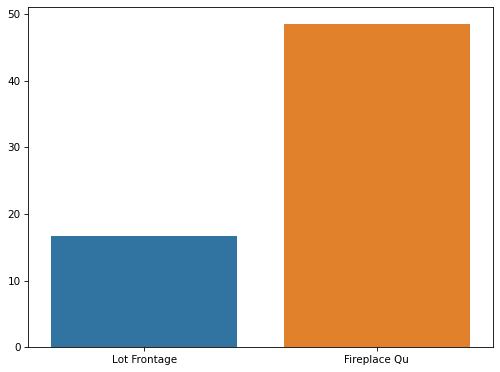

In [ ]:
plt.figure(figsize=(8,6), dpi=75)
sns.barplot(x=percent_nan.index, y=percent_nan)
plt.show()

Now check the remaining features carefully before taking decision because the NaN value is between 1%-80%

---

### **b. Check the missing Data between 1% and 80%**

    FireplaceQu: Fireplace quality

          Ex	Excellent - Exceptional Masonry Fireplace
          Gd	Good - Masonry Fireplace in main level
          TA	Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
          Fa	Fair - Prefabricated Fireplace in basement
          Po	Poor - Ben Franklin Stove
          NA	No Fireplace

It is a Categorical Data so:

In [ ]:
df_copy['Fireplace Qu'].value_counts()

Gd    741
TA    600
Fa     75
Po     46
Ex     43
Name: Fireplace Qu, dtype: int64

Because 'Fireplace Qu' is categorical, then the NaN value is 'None'

In [ ]:
df_copy['Fireplace Qu'] = df_copy['Fireplace Qu'].fillna("None")

In [ ]:
percent_nan = percent_missing(df_copy)

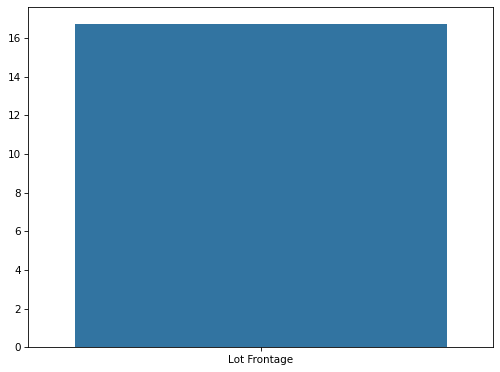

In [ ]:
plt.figure(figsize=(8,6), dpi=75)
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.show()

Now just Lot Frontage feature (Numerical & Continous)

---

### **c. [Imputation](https://en.wikipedia.org/wiki/Imputation_(statistics)) of Missing Data**

To `impute missing data`, we need to `decide` what `other filled in` (no NaN values) `feature` most probably `relates` and is `correlated` with the `missing feature data`. In this particular case we will use:

    Neighborhood: Physical locations within Ames city limits

    LotFrontage: Linear feet of street connected to property

We will operate under the `assumption` that the `Lot Frontage` is `related` to what `neighborhood` a house is in.

In [ ]:
df_copy['Neighborhood'].unique()

array(['NAmes', 'Gilbert', 'StoneBr', 'NWAmes', 'Somerst', 'BrDale',
       'NPkVill', 'NridgHt', 'Blmngtn', 'NoRidge', 'SawyerW', 'Sawyer',
       'Greens', 'BrkSide', 'OldTown', 'IDOTRR', 'ClearCr', 'SWISU',
       'Edwards', 'CollgCr', 'Crawfor', 'Blueste', 'Mitchel', 'Timber',
       'MeadowV', 'Veenker', 'GrnHill', 'Landmrk'], dtype=object)

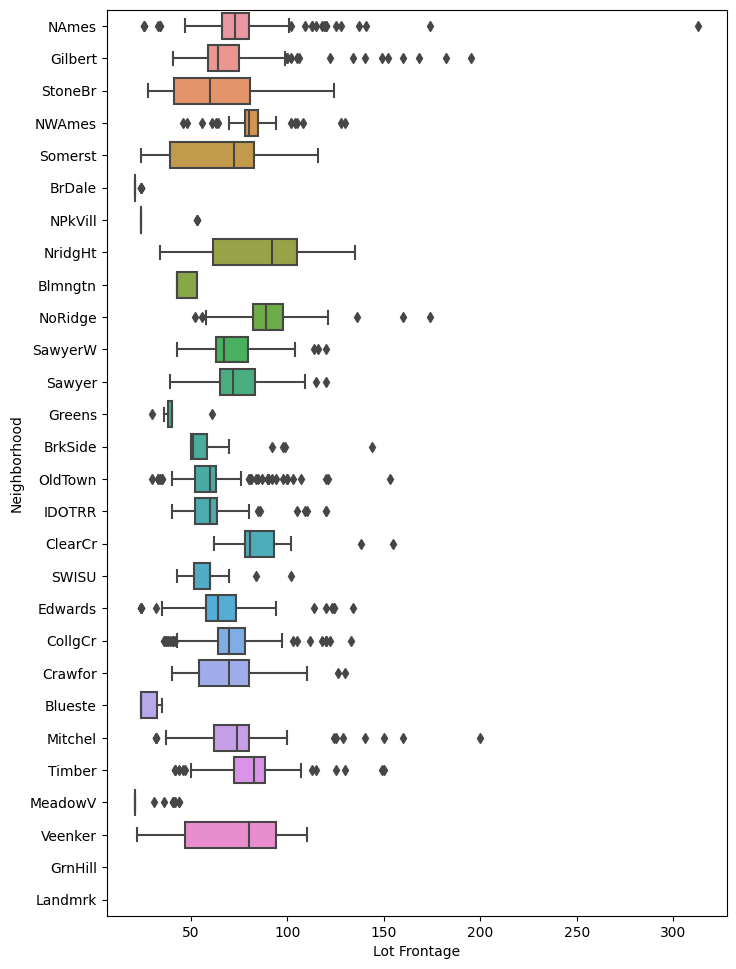

In [ ]:
plt.figure(figsize=(8,12), dpi=100)
sns.boxplot(x='Lot Frontage', y='Neighborhood', data=df_copy, orient='h')
plt.show()

In [ ]:
df_copy[['Lot Frontage', 'Neighborhood']].describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Lot Frontage,2435,NaN,NaN,NaN,69.0817,22.7932,21,58,68,80,313
Neighborhood,2925,28,NAmes,443,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The mean of 'Lot Frontage' of its 'Neighborhood' will be the fill value of NaN (because the mean and median is almost the same)

---

#### *Impute Missing Data based on other Features*

There are more complex methods, but usually the simpler the better, it avoids building models on top of other models.

More Info on Options: https://scikit-learn.org/stable/modules/impute.html

In [ ]:
# The Mean of Neighborhood group
df_copy.groupby('Neighborhood')['Lot Frontage'].mean()

Neighborhood
Blmngtn    46.900000
Blueste    27.300000
BrDale     21.500000
BrkSide    55.789474
ClearCr    88.150000
CollgCr    71.336364
Crawfor    69.951807
Edwards    64.794286
Gilbert    74.207207
Greens     41.000000
GrnHill          NaN
IDOTRR     62.383721
Landmrk          NaN
MeadowV    25.606061
Mitchel    75.144444
NAmes      75.210667
NPkVill    28.142857
NWAmes     81.517647
NoRidge    91.629630
NridgHt    84.184049
OldTown    61.777293
SWISU      59.068182
Sawyer     74.551020
SawyerW    70.669811
Somerst    64.549383
StoneBr    62.173913
Timber     81.303571
Veenker    72.000000
Name: Lot Frontage, dtype: float64

---

*Transform methods*

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.transform.html

In [ ]:
# Value before update
df_copy[['Lot Frontage', 'Neighborhood']].iloc[21:26]

,Lot Frontage,Neighborhood
21,85.0,NWAmes
22,NaN,Somerst
23,NaN,NAmes
24,NaN,NAmes
25,65.0,NAmes


In [ ]:
"""
  .transform()
  Call func on self, producing a DataFrame with transformed values. 
  Return DataFrame with same axis length as self.
  Doesnt return aggregated result.
"""

# Fill the NaN value of 'Lot Frontage' by the Mean of its 'Neighborhood' Group
df_copy['Lot Frontage'] = df_copy.groupby('Neighborhood')['Lot Frontage'].transform(lambda x: x.fillna(x.mean()))

# It is will return its original length with updated value based on function
df_copy['Lot Frontage']

0       141.000000
1        80.000000
2        81.000000
3        93.000000
4        74.000000
           ...    
2922     37.000000
2923     75.144444
2924     62.000000
2925     77.000000
2926     74.000000
Name: Lot Frontage, Length: 2925, dtype: float64

In [ ]:
# value after update
df_copy[['Lot Frontage', 'Neighborhood']].iloc[21:26]

,Lot Frontage,Neighborhood
21,85.000000,NWAmes
22,64.549383,Somerst
23,75.210667,NAmes
24,75.210667,NAmes
25,65.000000,NAmes


In [ ]:
percent_nan = percent_missing(df_copy)

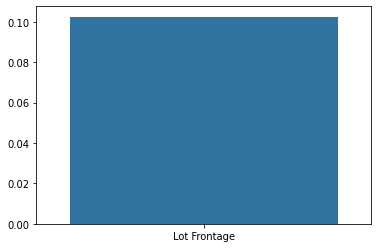

In [ ]:
sns.barplot(x=percent_nan.index, y=percent_nan)
plt.show()

The remaining NaN value will be fill by zero

In [ ]:
df_copy['Lot Frontage'] = df_copy['Lot Frontage'].fillna(0)

In [ ]:
percent_nan = percent_missing(df_copy)

In [ ]:
percent_nan

Series([], dtype: float64)

We no longer have any missing data in our entire data set! 

Keep in mind, we should eventually turn all these transformations into an easy to use function.

---

### **d. Save No Missing Data DF**

In [ ]:
df_copy.to_csv("/content/drive/MyDrive/Data_Science/Materi/Notes/6_Feature_Engineering/Ames_NO_Missing_Data.csv", index=False)

---
---

# **3 - Dealing with Categorical Data**

Many machine learning `models` can not deal with `categorical` data set as `strings`. For example linear regression can not apply a a Beta Coefficent to colors like "red" or "blue". `Instead` we need to `convert` these `categories` into "dummy" variables, otherwise known as "one-hot" encoding.

## **A. Data Description**

**Data**

We will open the .csv file that has been "cleaned" to remove outliers and NaN from the previous.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Data_Science/Materi/Notes/6_Feature_Engineering/Ames_NO_Missing_Data.csv")

In [ ]:
df.head()

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,20,RL,141.0,31770,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.0,TA,TA,CBlock,TA,Gd,Gd,BLQ,639.0,Unf,0.0,441.0,1080.0,GasA,Fa,Y,SBrkr,1656,0,0,1656,1.0,0.0,1,0,3,1,TA,7,Typ,2,Gd,Attchd,1960.0,Fin,2.0,528.0,TA,TA,P,210,62,0,0,0,0,0,5,2010,WD,Normal,215000
1,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,None,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,0,6,2010,WD,Normal,105000
2,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,None,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,12500,6,2010,WD,Normal,172000
3,20,RL,93.0,11160,Pave,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,BrkFace,None,0.0,Gd,TA,CBlock,TA,TA,No,ALQ,1065.0,Unf,0.0,1045.0,2110.0,GasA,Ex,Y,SBrkr,2110,0,0,2110,1.0,0.0,2,1,3,1,Ex,8,Typ,2,TA,Attchd,1968.0,Fin,2.0,522.0,TA,TA,Y,0,0,0,0,0,0,0,4,2010,WD,Normal,244000
4,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,0,3,2010,WD,Normal,189900


In [ ]:
with open('/content/drive/MyDrive/Data_Science/Materi/Notes/6_Feature_Engineering/Ames_Housing_Feature_Description.txt','r') as f: 
    print(f.read())

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

In [ ]:
df_copy = df.copy()

In [ ]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2925 entries, 0 to 2924
Data columns (total 76 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MS SubClass      2925 non-null   int64  
 1   MS Zoning        2925 non-null   object 
 2   Lot Frontage     2925 non-null   float64
 3   Lot Area         2925 non-null   int64  
 4   Street           2925 non-null   object 
 5   Lot Shape        2925 non-null   object 
 6   Land Contour     2925 non-null   object 
 7   Utilities        2925 non-null   object 
 8   Lot Config       2925 non-null   object 
 9   Land Slope       2925 non-null   object 
 10  Neighborhood     2925 non-null   object 
 11  Condition 1      2925 non-null   object 
 12  Condition 2      2925 non-null   object 
 13  Bldg Type        2925 non-null   object 
 14  House Style      2925 non-null   object 
 15  Overall Qual     2925 non-null   int64  
 16  Overall Cond     2925 non-null   int64  
 17  Year Built    

---

## **B. Numerical Column to Categorical**

We need to be careful when it comes to encoding categories as numbers. We want to make sure that the numerical relationship makes sense for a model. For example, the encoding MSSubClass is essentially just a number code per class:

    MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

The number itself does not appear to have a relationship to the other numbers. While 30 > 20 is True, it doesn't really make sense that "1-STORY 1945 & OLDER" > "1-STORY 1946 & NEWER ALL STYLES". Keep in mind, this isn't always the case, for example 1st class seats versus 2nd class seats encoded as 1 and 2. Make sure you fully understand your data set to examine what needs to be converted/changed.

### *Avoiding MultiCollinearity and the Dummy Variable Trap*

https://stats.stackexchange.com/questions/144372/dummy-variable-trap

In [ ]:
person_state =  pd.Series(['Dead','Alive','Dead','Alive','Dead','Dead'])

In [ ]:
person_state

0     Dead
1    Alive
2     Dead
3    Alive
4     Dead
5     Dead
dtype: object

In [ ]:
pd.get_dummies(person_state)

,Alive,Dead
0,0,1
1,1,0
2,0,1
3,1,0
4,0,1
5,0,1


In [ ]:
pd.get_dummies(person_state, drop_first=True)

,Dead
0,1
1,0
2,1
3,0
4,1
5,1


---

## **C. Creating Dummy Variables from Object Columns**

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.select_dtypes.html

In [ ]:
# Convert to String
df_copy['MS SubClass'] = df_copy['MS SubClass'].apply(str)

In [ ]:
# Select all data that has datatypes object/str to create dummy variable (One Hot Encoding)
df_objs = df_copy.select_dtypes(include='object')

In [ ]:
# Select all data that doesnt has datatypes object/str
df_nums = df_copy.select_dtypes(exclude='object')

---

### **a. Converting**

In [ ]:
# One Hot Encoding for categorical data and drop each of the categorical type
df_objs = pd.get_dummies(df_objs, drop_first=True)

In [ ]:
# Combine back the DataFrame by columns
final_df = pd.concat([df_nums, df_objs], axis=1)

In [ ]:
final_df.head()

,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice,MS SubClass_150,MS SubClass_160,MS SubClass_180,MS SubClass_190,...,Fireplace Qu_Fa,Fireplace Qu_Gd,Fireplace Qu_None,Fireplace Qu_Po,Fireplace Qu_TA,Garage Type_Attchd,Garage Type_Basment,Garage Type_BuiltIn,Garage Type_CarPort,Garage Type_Detchd,Garage Type_None,Garage Finish_None,Garage Finish_RFn,Garage Finish_Unf,Garage Qual_Fa,Garage Qual_Gd,Garage Qual_None,Garage Qual_Po,Garage Qual_TA,Garage Cond_Fa,Garage Cond_Gd,Garage Cond_None,Garage Cond_Po,Garage Cond_TA,Paved Drive_P,Paved Drive_Y,Sale Type_CWD,Sale Type_Con,Sale Type_ConLD,Sale Type_ConLI,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
0,141.0,31770,6,5,1960,1960,112.0,639.0,0.0,441.0,1080.0,1656,0,0,1656,1.0,0.0,1,0,3,1,7,2,1960.0,2.0,528.0,210,62,0,0,0,0,0,5,2010,215000,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,270.0,882.0,896,0,0,896,0.0,0.0,1,0,2,1,5,0,1961.0,1.0,730.0,140,0,0,0,120,0,0,6,2010,105000,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,406.0,1329.0,1329,0,0,1329,0.0,0.0,1,1,3,1,6,0,1958.0,1.0,312.0,393,36,0,0,0,0,12500,6,2010,172000,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
3,93.0,11160,7,5,1968,1968,0.0,1065.0,0.0,1045.0,2110.0,2110,0,0,2110,1.0,0.0,2,1,3,1,8,2,1968.0,2.0,522.0,0,0,0,0,0,0,0,4,2010,244000,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,137.0,928.0,928,701,0,1629,0.0,0.0,2,1,3,1,6,1,1997.0,2.0,482.0,212,34,0,0,0,0,0,3,2010,189900,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0


---

### **b. Final Thoughts**

Keep in mind, `we don't know` if 274 columns is very useful. More columns `doesn't` necessarily lead to `better` results. In fact, we may want to further remove columns (or later on use a model with `regularization` to `choose` important columns for us). What we have done here has `greatly` expanded the `ratio` of rows to columns, which may actually `lead` to `worse` performance (however you don't know until you've actually compared multiple models/approaches).

In [ ]:
final_df.corr()['SalePrice'].sort_values()

Exter Qual_TA       -0.591459
Kitchen Qual_TA     -0.527461
Fireplace Qu_None   -0.481740
Bsmt Qual_TA        -0.453022
Garage Finish_Unf   -0.422363
                       ...   
Garage Cars          0.648488
Total Bsmt SF        0.660983
Gr Liv Area          0.727279
Overall Qual         0.802637
SalePrice            1.000000
Name: SalePrice, Length: 274, dtype: float64

    OverallQual: Rates the overall material and finish of the house

           10	Very Excellent
           9	Excellent
           8	Very Good
           7	Good
           6	Above Average
           5	Average
           4	Below Average
           3	Fair
           2	Poor
           1	Very Poor

`Most likely` a human `realtor` rated this "Overall Qual" column, which means it `highly` likely `takes` into account many of the other `features`. It also means that any `future house` we intend to `predict` a price for will `need` this "Overall Qual" feature, which `implies` that `every` new house on the `market` that will be `priced` with our `ML` model will still `require` a human person!

---

### **c. Save Final DF**

In [ ]:
final_df.to_csv('/content/drive/MyDrive/Data_Science/Materi/Notes/6_Feature_Engineering/AMES_Final_DF.csv', index=False)

----
---